# 1D convection equation, finite difference, SciPy integration

_Gilbert François Duivesteijn_

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from scipy.linalg import toeplitz

from IPython import display

Let's look at the pure convection equation:

\begin{align}
\frac{\partial u}{\partial t} + U \frac{\partial u}{\partial x} &= 0
\end{align}

Discretize the spacial term around $i$:

\begin{align}
\left. U\frac{\partial u}{\partial x}\right|_{i} &= U\frac{u_i - u_{i-1}}{\Delta x},
\end{align}
and write it as a linear system of equations and cyclic boundary conditions:
\begin{align}
\frac{\partial u}{\partial t} &= -A\cdot u \\
\frac{\partial u}{\partial t} &= 
-U \begin{bmatrix}
\frac{1}{\Delta x} &  0 &  0 & \cdots &   \frac{-1}{\Delta x}\\
\frac{-1}{\Delta x}  & \frac{1}{\Delta x} &  0 & \cdots &  0 \\
 \vdots &    &  \ddots &  & \vdots \\
 0 &      \cdots & \frac{-1}{\Delta x} & \frac{1}{\Delta x} & 0 \\
 0 &     \cdots & 0 & \frac{-1}{\Delta x} & \frac{1}{\Delta x} \\
\end{bmatrix} 
\begin{bmatrix}
u_0 \\
u_1 \\
\vdots \\
u_{n-1} \\
u_{n}
\end{bmatrix}
\end{align}

Now we can solve this system of equations as a normal ODE.

_Note that the the solution has an error that builds up over time, due to the first order spacial discretization. This error looks like an artificial diffusion._

In [3]:
# Constant U
U = -1

# Spacial domain
n = 500
L = 2*np.pi
dx = L / n
x = np.linspace(0, L, n)

# Time steps
T0 = 0
Tn = 2*np.pi
t_steps = 200
t = np.linspace(T0, Tn, t_steps)

# Initial condition, a bump in the middle of the domain.
Uinit = np.sin(x/2)**16

# Discretization matrix A
A = np.eye(n)
A = A + np.diag(-1*np.ones(shape=(n-1,)), -1)
A[0, n-1] = -1
A = U/dx * A

In [4]:
print("\nA =")
print(A)


A =
[[-79.57747155  -0.          -0.         ...  -0.          -0.
   79.57747155]
 [ 79.57747155 -79.57747155  -0.         ...  -0.          -0.
   -0.        ]
 [ -0.          79.57747155 -79.57747155 ...  -0.          -0.
   -0.        ]
 ...
 [ -0.          -0.          -0.         ... -79.57747155  -0.
   -0.        ]
 [ -0.          -0.          -0.         ...  79.57747155 -79.57747155
   -0.        ]
 [ -0.          -0.          -0.         ...  -0.          79.57747155
  -79.57747155]]


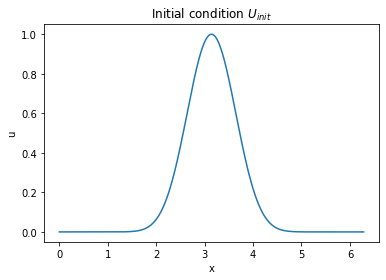

In [5]:
plt.figure()
plt.plot(x, Uinit)
plt.xlabel("x")
plt.ylabel("u")
plt.title("Initial condition $U_{init}$")
plt.show()

In [6]:
def fn(u, t, A):
    return (np.matmul(A, u))

In [7]:
%%time

u = odeint(fn, Uinit, t, args=(A,))

CPU times: user 924 ms, sys: 1.01 s, total: 1.94 s
Wall time: 55.6 ms


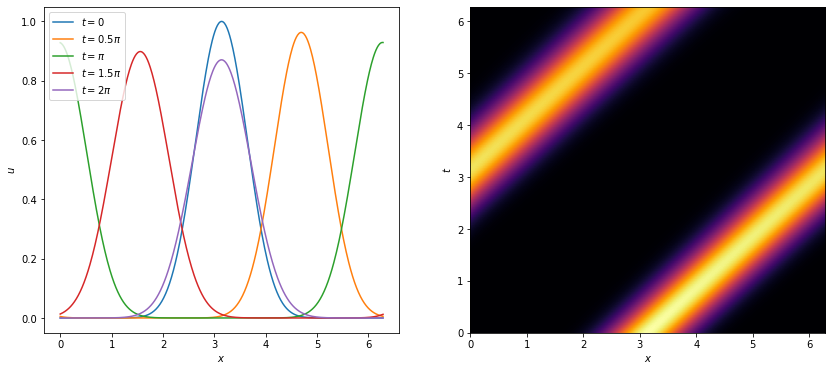

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
#axs[0].set_ylim(min(U0, Un),max(U0,Un))
axs[0].plot(x, u[0], label="$t=0$")
axs[0].plot(x, u[49], label="$t=0.5\pi$")
axs[0].plot(x, u[99], label="$t=\pi$")
axs[0].plot(x, u[149], label="$t=1.5\pi$")
axs[0].plot(x, u[199], label="$t=2\pi$")
axs[0].legend()
axs[0].set_ylabel("$u$")
axs[0].set_xlabel("$x$")
axs[1].imshow(u, aspect="auto", cmap="inferno", extent=[0, L, T0, Tn], origin="lower")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$t$")
plt.show()

In [9]:
# Animation of the solution over the integrated time span.

def animate(frame):
    y = u[frame]
    line.set_data((x, y))
    plt.title(f"t={Tn * frame / t_steps:0.2f}")

    
fig = plt.figure(figsize=(12,6))
lines = plt.plot([])
line = lines[0]
plt.xlim([0, L])
plt.ylim([0, 1])
plt.xlabel("x")
plt.ylabel("u")
plt.title("")
  
anim = FuncAnimation(fig, animate, frames=t_steps, interval=50)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()